# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from selenium import webdriver
import time

## **Scrapping Movies Data**

In [2]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [3]:
# Write Your Code here
dictionary = {}
base_url = "https://www.justwatch.com"
for link in soup.find_all('a', class_="title-list-grid__item--link"):
    href = link.get('href')
    complete_url = base_url + href
    parts = href.split('/')
    movie_name = parts[-1]
    dictionary[movie_name.title()] = complete_url

print(dictionary)

{'Hanu-Man': 'https://www.justwatch.com/in/movie/hanu-man', 'Oppenheimer': 'https://www.justwatch.com/in/movie/oppenheimer', 'Untitled-Shahid-Kapoor-Kriti-Sanon-Film': 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'Fighter-2022': 'https://www.justwatch.com/in/movie/fighter-2022', 'Poor-Things': 'https://www.justwatch.com/in/movie/poor-things', 'Anatomie-Dune-Chute': 'https://www.justwatch.com/in/movie/anatomie-dune-chute', 'Bramayugam': 'https://www.justwatch.com/in/movie/bramayugam', 'Dune-2021': 'https://www.justwatch.com/in/movie/dune-2021', 'Animal-2022': 'https://www.justwatch.com/in/movie/animal-2022', 'Merry-Christmas-2024': 'https://www.justwatch.com/in/movie/merry-christmas-2024', '12Th-Fail': 'https://www.justwatch.com/in/movie/12th-fail', 'Road-House-2024': 'https://www.justwatch.com/in/movie/road-house-2024', 'Anyone-But-You': 'https://www.justwatch.com/in/movie/anyone-but-you', 'Anweshippin-Kandethum': 'https://www.justwatch.com/in/movie/anw

## **Scrapping Movie Title**

In [4]:
# Write Your Code here
df = pd.DataFrame(dictionary.items(), columns=['Movie Name', 'URL'], index=range(1, len(dictionary)+1))
df

Movie Name  \
1                                   Hanu-Man   
2                                Oppenheimer   
3    Untitled-Shahid-Kapoor-Kriti-Sanon-Film   
4                               Fighter-2022   
5                                Poor-Things   
..                                       ...   
96                                    Pushpa   
97                        Emily-The-Criminal   
98                                    Fast-X   
99                  Kimitachi-Wa-Do-Ikiru-Ka   
100                                      Ram   

                                                   URL  
1          https://www.justwatch.com/in/movie/hanu-man  
2       https://www.justwatch.com/in/movie/oppenheimer  
3    https://www.justwatch.com/in/movie/untitled-sh...  
4      https://www.justwatch.com/in/movie/fighter-2022  
5       https://www.justwatch.com/in/movie/poor-things  
..                                                 ...  
96           https://www.justwatch.com/in/movie/pushpa  
97   https://www.justwatch.com/in/movie/emily-the-c...  
98           https://www.justwatch.com/in/movie/fast-x  
99   https://www.justwatch.com/in/movie/kimitachi-w...  
100             https://www.justwatch.com/in/movie/ram  

[100 rows x 2 columns]

## **Scrapping release Year**

In [5]:
# Write Your Code here
Release_Year = []

for  movie, url in dictionary.items():
    driver = webdriver.Chrome()
    time.sleep(3)
    page = driver.get(url)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    try:
        release_year_tag = soup.find('span', class_='text-muted')
        release_year = release_year_tag.text.strip()
    except AttributeError:
        release_year = 'N/A'
    Release_Year.append(release_year)
print(Release_Year)

['(2024)', '(2023)', '(2024)', '(2024)', '(2023)', '(2023)', '(2024)', '(2021)', '(2023)', '(2024)', '(2023)', '(2024)', '(2023)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2023)', '(2008)', '(2023)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2023)', '(2023)', '(2024)', '(2020)', '(2023)', '(2023)', '(2024)', '(2023)', '(2024)', '(2024)', '(2023)', '(2023)', '(2024)', '(2023)', '(2023)', '(2001)', '(2020)', '(2023)', '(2021)', '(2024)', '(2023)', '(2024)', '(2023)', '(2024)', '(2023)', '(2024)', '(2024)', '(2023)', '(2011)', '(2024)', '(2013)', '(2024)', '(2024)', '(2023)', '(2024)', '(2024)', '(2022)', '(2005)', '(2023)', '(2019)', '(2022)', '(2024)', '(2023)', '(2019)', '(2014)', '(2024)', '(2023)', '(2016)', '(2021)', '(2017)', '(2019)', '(2022)', '(2018)', '(2024)', '(2014)', '(2016)', '(2019)', '(2014)', '(2023)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2021)', '(2022)', '(2023)', '(2023)', '(2024)']

## **Scrapping Genres**

In [6]:
url = "https://www.justwatch.com/in/movie/dune-2021"
driver = webdriver.Chrome()
time.sleep(2)
page = driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')
All_tags = soup.find_all("div", "detail-infos")
All_tags

[<div class="detail-infos" data-v-1e997566=""><h3 class="detail-infos__subheading" data-v-1e997566=""> Streaming Charts <span class="detail-infos__subheading--icon" data-v-1e997566=""><svg aria-hidden="true" class="svg-inline--fa fa-circle-info" data-icon="circle-info" data-prefix="fas" data-v-1e997566="" focusable="false" role="img" viewbox="0 0 512 512" xmlns="http://www.w3.org/2000/svg"><path class="" d="M256 512A256 256 0 1 0 256 0a256 256 0 1 0 0 512zM216 336h24V272H216c-13.3 0-24-10.7-24-24s10.7-24 24-24h48c13.3 0 24 10.7 24 24v88h8c13.3 0 24 10.7 24 24s-10.7 24-24 24H216c-13.3 0-24-10.7-24-24s10.7-24 24-24zm40-208a32 32 0 1 1 0 64 32 32 0 1 1 0-64z" data-v-1e997566="" fill="currentColor"></path></svg></span><div class="popover" data-v-1e997566=""><p data-v-1e997566=""> The JustWatch Daily Streaming Charts are calculated by user activity within the last 24 hours. This includes clicking on a streaming offer, adding a title to a watchlist, and marking a title as 'seen'. This includ

In [7]:
# Write Your Code here
Genres = []

# Assuming you have your dictionary
for movie, url in dictionary.items():
    # Initialize the webdriver
    driver = webdriver.Chrome()
    try:
        # Add a delay of 5 seconds before making each request
        time.sleep(5)
        # Get the webpage
        driver.get(url)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(driver.page_source, "html.parser")
        # Finding the genres
        genres_tags = soup.find_all("div", "detail-infos")
        genres_found = False
        for detail_info in genres_tags:
            genres_heading = detail_info.find("h3", string='Genres')
            if genres_heading:
                genres_value = detail_info.find("div", "detail-infos__value")
                if genres_value:
                    genres = genres_value.text.strip()
                    genres_found = True
                    break
        if not genres_found:
            genres = "Genres Not Found"
        Genres.append([genres])
    finally:
        # Close the webdriver to release resources
        driver.quit()

print(Genres)

[['Fantasy, Action & Adventure, Comedy, Science-Fiction'], ['Drama, History'], ['Comedy, Drama, Romance, Science-Fiction'], ['Action & Adventure, Mystery & Thriller, War & Military'], ['Science-Fiction, Romance, Comedy, Drama'], ['Crime, Mystery & Thriller, Drama'], ['Horror, Mystery & Thriller'], ['Science-Fiction, Action & Adventure, Drama'], ['Action & Adventure, Crime, Drama, Mystery & Thriller'], ['Mystery & Thriller, Drama'], ['Drama'], ['Mystery & Thriller, Action & Adventure'], ['Comedy, Romance'], ['Drama, Mystery & Thriller, Crime'], ['Comedy, Crime, Mystery & Thriller, Romance, Horror'], ['Mystery & Thriller, Drama, Action & Adventure'], ['Mystery & Thriller, Horror'], ['Drama'], ['Comedy, Romance'], ['Drama, Mystery & Thriller, Action & Adventure'], ['Drama, War & Military, History'], ['Comedy, Action & Adventure, Animation, Kids & Family, Fantasy'], ['Action & Adventure, Crime, Drama, Mystery & Thriller'], ['Action & Adventure, Mystery & Thriller'], ['Science-Fiction, Dram

## **Scrapping IMBD Rating**

In [8]:
# Write Your Code here
Imdb = []
for movie, url in dictionary.items():
    driver = webdriver.Chrome()
    time.sleep(5)
    page = driver.get(url)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    imdb_ratings = soup.find_all('div', class_='jw-scoring-listing__rating')
    try:
        imdb_rating = imdb_ratings[1].text.strip()
    except IndexError:
        imdb_rating = "Not Found"  
    Imdb.append(imdb_rating)
print(Imdb)


['8.0  (21k)', '8.3  (707k)', '6.6  (44k)', '6.4  (42k)', '8.0  (226k)', '7.7  (108k)', '8.0  (6k)', '8.0  (837k)', '6.2  (87k)', '7.0  (24k)', '9.0  (108k)', '6.2  (83k)', '6.2  (60k)', '7.5  (5k)', '6.5  (48k)', '8.7  (6k)', '7.8  (34k)', '8.3  (2k)', '8.3  (3k)', '8.2  (10k)', '7.8  (15k)', '7.6  (519k)', '6.5  (62k)', '6.5  (4k)', '8.8  (304k)', '6.1  (69k)', '6.4  (76k)', '8.4  (2k)', '8.1  (23k)', '3.8  (49k)', '6.6  (22k)', '8.3  (47k)', '7.0  (71k)', '6.6  (2k)', '3.3  (98k)', '5.6  (78k)', '6.7  (72k)', '6.3', '7.9  (131k)', '7.1  (1k)', '7.1  (4k)', '6.5  (39k)', '7.5  (70k)', '6.0  (1k)', '6.7  (21k)', '7.4', '7.6  (853k)', '7.8  (395k)', '7.6  (68k)', '6.3  (238k)', '8.4  (26k)', '6.8  (527k)', '6.6  (6k)', '7.4  (40k)', '5.2', '7.6  (232k)', '6.4', '5.4  (19k)', '7.0  (93k)', '7.3  (318k)', '5.4', '8.2  (1m)', '6.0  (3k)', '6.3  (4k)', '6.8  (14k)', '5.8  (1k)', '6.5  (4k)', '7.2  (3k)', '6.5  (138k)', '7.9  (110k)', '6.1  (51k)', '7.3  (38k)', '8.4  (3k)', '7.6  (1k)', '8

## **Scrapping Runtime/Duration**

In [9]:
# Write Your Code here
Runtimes = []

# Assuming you have your dictionary
for movie, url in dictionary.items():
    # Initialize the webdriver
    driver = webdriver.Chrome()
    try:
        # Add a delay of 5 seconds before making each request
        time.sleep(5)
        # Get the webpage
        driver.get(url)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(driver.page_source, "html.parser")
        # Finding the runtime
        runtime_tags = soup.find_all("div", "detail-infos")
        runtime_found = False
        for detail_info in runtime_tags:
            runtime_heading = detail_info.find("h3", string='Runtime')
            if runtime_heading:
                runtime_value = detail_info.find("div", "detail-infos__value")
                if runtime_value:
                    runtime = runtime_value.text.strip()
                    runtime_found = True
                    break
        if not runtime_found:
            runtime = "Runtime Not Found" 
        Runtimes.append(runtime)
    finally:
        # Close the webdriver to release resources
        driver.quit()

print(Runtimes)


['2h 39min', '3h 0min', '2h 21min', '2h 47min', '2h 22min', '2h 32min', '2h 19min', '2h 35min', '3h 21min', '2h 23min', '2h 27min', '2h 1min', '1h 43min', '2h 22min', '2h 22min', '2h 15min', '2h 10min', '2h 19min', '2h 36min', '2h 38min', '2h 30min', '1h 30min', '2h 55min', '2h 39min', '2h 47min', '1h 50min', '1h 45min', '2h 2min', '1h 58min', '1h 56min', '1h 55min', '2h 5min', '2h 18min', '2h 23min', '1h 54min', '2h 4min', '2h 40min', '2h 24min', '2h 13min', '2h 25min', '2h 19min', '2h 11min', '1h 46min', '2h 24min', '1h 23min', '2h 2min', '2h 32min', '1h 53min', '1h 57min', '1h 54min', '2h 23min', '1h 54min', '2h 37min', '2h 0min', '2h 10min', '3h 26min', '1h 34min', '2h 39min', '2h 49min', '1h 31min', '2h 34min', '3h 0min', '2h 35min', '2h 10min', '2h 20min', '2h 13min', '2h 34min', '2h 1min', '1h 25min', '1h 46min', '1h 39min', '2h 9min', '2h 35min', '2h 8min', '2h 2min', '2h 49min', '2h 5min', '1h 42min', '1h 35min', '2h 28min', '1h 58min', '2h 18min', '2h 46min', '1h 53min', '2h 

## **Scrapping Age Rating**

In [10]:
# Write Your Code here
Age_ratings = []

# Assuming you have your dictionary
for movie, url in dictionary.items():
    # Initialize the webdriver
    driver = webdriver.Chrome()
    try:
        # Add a delay of 5 seconds before making each request
        time.sleep(5)
        # Get the webpage
        driver.get(url)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(driver.page_source, "html.parser")
        # Finding the age rating
        age_rating_tags = soup.find_all("div", "detail-infos")
        age_rating_found = False
        for detail_info in age_rating_tags:
            age_rating_heading = detail_info.find("h3", string='Age rating')
            if age_rating_heading:
                age_rating_value = detail_info.find("div", "detail-infos__value")
                if age_rating_value:
                    age_rating = age_rating_value.text.strip()
                    age_rating_found = True
                    break
        if not age_rating_found:
            age_rating = "Age Rating Not Found"
        print(age_rating)
        Age_ratings.append(age_rating)
    finally:
        # Close the webdriver to release resources
        driver.quit()

print(Age_ratings)


UA
UA
Age Rating Not Found
UA
A
Age Rating Not Found
UA
UA
A
Age Rating Not Found
Age Rating Not Found
Age Rating Not Found
Age Rating Not Found
Age Rating Not Found
Age Rating Not Found
UA
UA
UA
U
UA
UA
U
A
UA
Age Rating Not Found
Age Rating Not Found
Age Rating Not Found
Age Rating Not Found
UA
Age Rating Not Found
UA
Age Rating Not Found
A
Age Rating Not Found
Age Rating Not Found
Age Rating Not Found
UA
U
Age Rating Not Found
Age Rating Not Found
UA
Age Rating Not Found
UA
Age Rating Not Found
U
Age Rating Not Found
U
A
Age Rating Not Found
UA
UA
UA
UA
Age Rating Not Found
Age Rating Not Found
A
Age Rating Not Found
UA
UA
U
Age Rating Not Found
A
Age Rating Not Found
Age Rating Not Found
UA
Age Rating Not Found
Age Rating Not Found
UA
U
UA
A
A
Age Rating Not Found
Age Rating Not Found
A
Age Rating Not Found
U
Age Rating Not Found
Age Rating Not Found
UA
Age Rating Not Found
UA
UA
A
UA
Age Rating Not Found
A
UA
Age Rating Not Found
Age Rating Not Found
Age Rating Not Found
Age Ratin

## **Fetching Production Countries Details**

In [11]:
# Write Your Code here
Production_countries = []

# Assuming you have your dictionary
for movie, url in dictionary.items():
    # Initialize the webdriver
    driver = webdriver.Chrome()
    try:
        # Add a delay of 5 seconds before making each request
        time.sleep(5)
        # Get the webpage
        driver.get(url)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(driver.page_source, "html.parser")
        # Finding the production country
        country_tags = soup.find_all("div", "detail-infos")
        country = "Production Country Not Found"
        for detail_info in country_tags:
            if "Production country" in detail_info.text:
                country_value = detail_info.find_next("div", class_="detail-infos__value")
                if country_value:
                    country = country_value.text.strip()
                    break
        # print(country)
        Production_countries.append([country])
    finally:
        # Close the webdriver to release resources
        driver.quit()

print(Production_countries)


[['India'], ['United States, United Kingdom'], ['India'], ['India'], ['United Kingdom, United States, Ireland'], ['France'], ['India'], ['United States'], ['India'], ['India'], ['India'], ['United States'], ['United States, Australia'], ['India'], ['India'], ['India'], ['India'], ['India'], ['India'], ['India'], ['India'], ['United States'], ['India'], ['India'], ['United States'], ['United States'], ['United Kingdom, United States'], ['India'], ['India'], ['United States'], ['United States, Australia'], ['Japan'], ['India'], ['India'], ['Poland'], ['United States'], ['India'], ['India'], ['United States'], ['India'], ['India'], ['United Kingdom, United States'], ['Poland, United Kingdom, United States'], ['India'], ['United States'], ['India'], ['United States, United Kingdom'], ['United Kingdom, United States'], ['United States'], ['United States'], ['India'], ['United Kingdom, United States'], ['India'], ['Canada'], ['India'], ['United States'], ['United States'], ['India'], ['India

## **Fetching Streaming Service Details**

In [12]:
# Write Your Code here
alt_attributes = []

# Assuming you have your dictionary
for movie, url in dictionary.items():
    movie_alt_attributes = []  # List to store alt attributes for each movie
    # Initialize the webdriver
    driver = webdriver.Chrome()
    try:
        # Add a delay of 2 seconds before making each request
        time.sleep(5)
        # Get the webpage
        driver.get(url)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(driver.page_source, "html.parser")
        # Finding picture tags with class 'picture-wrapper'
        picture_tags = soup.find_all("picture", class_="picture-wrapper")
        for picture_tag in picture_tags:
            img_tag = picture_tag.find("img")
            if img_tag:
                alt = img_tag.get("alt")
                movie_alt_attributes.append(alt)
        print(movie_alt_attributes)
    finally:
        # Close the webdriver to release resources
        driver.quit()
    
    alt_attributes.append(set(movie_alt_attributes))

print(alt_attributes)

['Jio Cinema', 'Zee5']
['Apple TV', 'Jio Cinema', 'Amazon Video', 'Hungama Play', 'Apple TV', 'Google Play Movies', 'YouTube', 'Apple TV', 'Google Play Movies', 'YouTube']
['Amazon Prime Video', 'Bookmyshow', 'Amazon Video']
['Netflix']
['Apple TV', 'Hotstar', 'Apple TV', 'Google Play Movies', 'YouTube', 'Apple TV', 'Google Play Movies', 'YouTube']
['Amazon Prime Video']
['Sony Liv', 'Bookmyshow']
['Apple TV', 'Netflix', 'Bookmyshow', 'Amazon Video', 'Apple TV', 'Google Play Movies', 'YouTube', 'Apple TV', 'Google Play Movies', 'YouTube']
['Netflix', 'Bookmyshow']
['Netflix']
['Hotstar', 'Bookmyshow']
['Amazon Prime Video']
['Apple TV', 'Zee5', 'Amazon Video', 'Apple TV', 'Google Play Movies', 'YouTube', 'Apple TV', 'Google Play Movies', 'YouTube']
['Netflix', 'Bookmyshow']
['Netflix']
['Bookmyshow']
[]
['Amazon Prime Video']
['Bookmyshow']
[]
['Zee5']
['Apple TV', 'Zee5', 'Amazon Video', 'Apple TV', 'Google Play Movies', 'YouTube', 'Hungama Play', 'Apple TV', 'Google Play Movies', 'Yo

# Combining all the code in one place

In [13]:
# Initialize the lists
Release_Year = []
Genres = []
Imdb = []
Runtimes = []
Age_ratings = []
Production_countries = []
Alt_attributes = []

# Assuming you have your dictionary
for movie, url in dictionary.items():
    # Initialize the webdriver
    driver = webdriver.Chrome()
    try:
        # Add a delay of 5 seconds before making each request
        time.sleep(5)
        # Get the webpage
        driver.get(url)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # Finding the required information
        details = soup.find_all("div", class_="detail-infos")
        details_dict = {detail.find("h3", class_="detail-infos__subheading").text.strip(): detail.find("div", class_="detail-infos__value").text.strip() for detail in details}

        # Release Year
        try:
            release_year_tag = soup.find('span', class_='text-muted')
            release_year = release_year_tag.text.strip()
        except AttributeError:
            release_year = 'N/A'
        Release_Year.append(release_year)

        # Genres
        Genres.append(details_dict.get('Genres', 'Genres Not Found'))

        # IMDb Rating
        imdb_ratings = soup.find_all('div', class_='jw-scoring-listing__rating')
        try:
            Imdb.append(imdb_ratings[1].text.strip())
        except IndexError:
            Imdb.append('IMDb Rating Not Found')

        # Runtime
        Runtimes.append(details_dict.get('Runtime', 'Runtime Not Found'))

        # Age Rating
        Age_ratings.append(details_dict.get('Age rating', 'Age Rating Not Found'))

        # Production Country
        Production_countries.append(details_dict.get('Production country', 'Production Country Not Found'))

        # Alt Attributes
        picture_tags = soup.find_all("picture", class_="picture-wrapper")
        movie_alt_attributes = set()
        for picture_tag in picture_tags:
            img_tag = picture_tag.find("img")
            if img_tag:
                alt = img_tag.get("alt")
                if alt:
                    movie_alt_attributes.add(alt)
        Alt_attributes.append(list(movie_alt_attributes))

    finally:
        # Close the webdriver to release resources
        driver.quit()

# Print the extracted information
print("Release Years:", Release_Year)
print("Genres:", Genres)
print("IMDb Ratings:", Imdb)
print("Runtimes:", Runtimes)
print("Age Ratings:", Age_ratings)
print("Production Countries:", Production_countries)
print("Alt Attributes:", Alt_attributes)


Release Years: ['(2024)', '(2023)', '(2024)', '(2024)', '(2023)', '(2023)', '(2024)', '(2021)', '(2023)', '(2024)', '(2023)', '(2024)', '(2023)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2023)', '(2008)', '(2023)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2023)', '(2023)', '(2024)', '(2020)', '(2023)', '(2023)', '(2024)', '(2023)', '(2024)', '(2024)', '(2023)', '(2023)', '(2024)', '(2023)', '(2023)', '(2001)', '(2020)', '(2023)', '(2021)', '(2024)', '(2023)', '(2024)', '(2023)', '(2024)', '(2023)', '(2024)', '(2024)', '(2023)', '(2011)', '(2024)', '(2013)', '(2024)', '(2024)', '(2023)', '(2024)', '(2024)', '(2022)', '(2005)', '(2023)', '(2019)', '(2022)', '(2024)', '(2023)', '(2019)', '(2014)', '(2024)', '(2023)', '(2016)', '(2021)', '(2017)', '(2019)', '(2022)', '(2018)', '(2024)', '(2014)', '(2016)', '(2019)', '(2014)', '(2023)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2021)', '(2022)', '(2023)', '(20

## **Now Creating Movies DataFrame**

In [14]:
# Write Your Code here
df["Release Year"] = Release_Year
df['Genres'] = Genres
df['IMDB Rating'] = Imdb
df['Runtimes'] = Runtimes
df['Age Ratings'] = Age_ratings
df['Production Countries'] = Production_countries
df['Streaming Services'] = Alt_attributes
df

Movie Name  \
1                                   Hanu-Man   
2                                Oppenheimer   
3    Untitled-Shahid-Kapoor-Kriti-Sanon-Film   
4                               Fighter-2022   
5                                Poor-Things   
..                                       ...   
96                                    Pushpa   
97                        Emily-The-Criminal   
98                                    Fast-X   
99                  Kimitachi-Wa-Do-Ikiru-Ka   
100                                      Ram   

                                                   URL Release Year  \
1          https://www.justwatch.com/in/movie/hanu-man       (2024)   
2       https://www.justwatch.com/in/movie/oppenheimer       (2023)   
3    https://www.justwatch.com/in/movie/untitled-sh...       (2024)   
4      https://www.justwatch.com/in/movie/fighter-2022       (2024)   
5       https://www.justwatch.com/in/movie/poor-things       (2023)   
..                                                 ...          ...   
96           https://www.justwatch.com/in/movie/pushpa       (2021)   
97   https://www.justwatch.com/in/movie/emily-the-c...       (2022)   
98           https://www.justwatch.com/in/movie/fast-x       (2023)   
99   https://www.justwatch.com/in/movie/kimitachi-w...       (2023)   
100             https://www.justwatch.com/in/movie/ram       (2024)   

                                                Genres  IMDB Rating  Runtimes  \
1    Fantasy, Action & Adventure, Comedy, Science-F...   8.0  (21k)  2h 39min   
2                                       History, Drama  8.3  (707k)   3h 0min   
3              Comedy, Drama, Romance, Science-Fiction   6.6  (44k)  2h 21min   
4    Action & Adventure, Mystery & Thriller, War & ...   6.4  (42k)  2h 47min   
5              Science-Fiction, Romance, Comedy, Drama  8.0  (226k)  2h 22min   
..                                                 ...          ...       ...   
96   Mystery & Thriller, Action & Adventure, Drama,...   7.6  (87k)  2h 55min   
97                    Mystery & Thriller, Crime, Drama   6.7  (53k)  1h 37min   
98       Mystery & Thriller, Action & Adventure, Crime  5.8  (118k)  2h 22min   
99   Animation, Action & Adventure, Fantasy, Kids &...   7.6  (49k)   2h 4min   
100                                              Drama    7.9  (2k)  2h 32min   

              Age Ratings                    Production Countries  \
1                      UA                                   India   
2                      UA           United States, United Kingdom   
3    Age Rating Not Found                                   India   
4                      UA                                   India   
5                       A  United States, Ireland, United Kingdom   
..                    ...                                     ...   
96                     UA                                   India   
97   Age Rating Not Found                           United States   
98                     UA                           United States   
99   Age Rating Not Found                                   Japan   
100                    UA                                   India   

                                    Streaming Services  
1                                   [Jio Cinema, Zee5]  
2    [Hungama Play, Jio Cinema, Google Play Movies,...  
3       [Amazon Prime Video, Bookmyshow, Amazon Video]  
4                                            [Netflix]  
5     [YouTube, Apple TV, Google Play Movies, Hotstar]  
..                                                 ...  
96                  [Amazon Prime Video, Amazon Video]  
97                       [Netflix, Zee5, Amazon Video]  
98   [Jio Cinema, Zee5, Google Play Movies, Amazon ...  
99                                                  []  
100                               [Amazon Prime Video]  

[100 rows x 9 columns]

In [20]:
df.to_csv('Movie_Data.csv', index=False)

## **Scraping TV  Show Data**

In [21]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [22]:
# Write Your Code here
# Write Your Code here
dictionary_tv = {}
base_url = "https://www.justwatch.com"
for link in soup.find_all('a', class_="title-list-grid__item--link"):
    href = link.get('href')
    complete_url = base_url + href
    parts = href.split('/')
    tv_shows_name = parts[-1]
    dictionary_tv[tv_shows_name.title()] = complete_url

print(dictionary_tv)

{'Shogun-2024': 'https://www.justwatch.com/in/tv-show/shogun-2024', 'Mirzapur': 'https://www.justwatch.com/in/tv-show/mirzapur', '3-Body-Problem': 'https://www.justwatch.com/in/tv-show/3-body-problem', 'Panchayat': 'https://www.justwatch.com/in/tv-show/panchayat', 'The-Gentlemen': 'https://www.justwatch.com/in/tv-show/the-gentlemen', 'Game-Of-Thrones': 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'Maharani-2021': 'https://www.justwatch.com/in/tv-show/maharani-2021', 'Sunflower-2021': 'https://www.justwatch.com/in/tv-show/sunflower-2021', 'Maamla-Legal-Hai': 'https://www.justwatch.com/in/tv-show/maamla-legal-hai', 'Solo-Leveling-2024': 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'Apharan': 'https://www.justwatch.com/in/tv-show/apharan', 'Jujutsu-Kaisen': 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen', 'Halo': 'https://www.justwatch.com/in/tv-show/halo', 'Attack-On-Titan': 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'Avatar-The-Last-Airbender'

In [23]:
len(dictionary_tv)

100

## **Fetching Tv Show Title details**

In [24]:
# Write Your Code here
df_tv = pd.DataFrame(dictionary_tv.items(), columns=['TV Show Name', 'URL'], index=range(1, len(dictionary_tv)+1))
df_tv

TV Show Name                                                URL
1           Shogun-2024   https://www.justwatch.com/in/tv-show/shogun-2024
2              Mirzapur      https://www.justwatch.com/in/tv-show/mirzapur
3        3-Body-Problem  https://www.justwatch.com/in/tv-show/3-body-pr...
4             Panchayat     https://www.justwatch.com/in/tv-show/panchayat
5         The-Gentlemen  https://www.justwatch.com/in/tv-show/the-gentl...
..                  ...                                                ...
96            Wecrashed     https://www.justwatch.com/in/tv-show/wecrashed
97     The-Walking-Dead  https://www.justwatch.com/in/tv-show/the-walki...
98            Wednesday     https://www.justwatch.com/in/tv-show/wednesday
99   All-Of-Us-Are-Dead  https://www.justwatch.com/in/tv-show/all-of-us...
100              Flames        https://www.justwatch.com/in/tv-show/flames

[100 rows x 2 columns]

## **Fetching Release Year**

In [19]:
# Write Your Code here
Release_Year_tv = []

for  tv_show, url in dictionary_tv.items():
    driver = webdriver.Chrome()
    time.sleep(3)
    page = driver.get(url)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    try:
        release_year_tag = soup.find('span', class_='text-muted')
        release_year = release_year_tag.text.strip()
    except AttributeError:
        release_year = 'N/A'
    Release_Year_tv.append(release_year)
    print(release_year)
print(Release_Year_tv)

(2024)


KeyboardInterrupt: 

In [ ]:
len(Release_Year_tv)

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
# Write Your Code here
Genres_tv = []

# Assuming you have your dictionary
for movie, url in dictionary_tv.items():
    # Initialize the webdriver
    driver = webdriver.Chrome()
    try:
        # Add a delay of 5 seconds before making each request
        time.sleep(5)
        # Get the webpage
        driver.get(url)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(driver.page_source, "html.parser")
        # Finding the genres
        genres_tags = soup.find_all("div", "detail-infos")
        genres_found = False
        for detail_info in genres_tags:
            genres_heading = detail_info.find("h3", string='Genres')
            if genres_heading:
                genres_value = detail_info.find("div", "detail-infos__value")
                if genres_value:
                    genres = genres_value.text.strip()
                    genres_found = True
                    break
        if not genres_found:
            genres = "Genres Not Found"
        print(genres)
        Genres_tv.append([genres])
    finally:
        # Close the webdriver to release resources
        driver.quit()

print(Genres_tv)

In [ ]:
len(Genres_tv)

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
# Write Your Code here
Imdb_tv = []
for movie, url in dictionary_tv.items():
    driver = webdriver.Chrome()
    time.sleep(5)
    page = driver.get(url)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    imdb_ratings = soup.find_all('div', class_='jw-scoring-listing__rating')
    try:
        imdb_rating = imdb_ratings[1].text.strip()
    except IndexError:
        imdb_rating = "Not Found"  
    Imdb_tv.append(imdb_rating)
print(Imdb_tv)


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
Age_ratings_tv = []

# Assuming you have your dictionary
for movie, url in dictionary_tv.items():
    # Initialize the webdriver
    driver = webdriver.Chrome()
    try:
        # Add a delay of 5 seconds before making each request
        time.sleep(5)
        # Get the webpage
        driver.get(url)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(driver.page_source, "html.parser")
        # Finding the age rating
        age_rating_tags = soup.find_all("div", "detail-infos")
        age_rating_found = False
        for detail_info in age_rating_tags:
            age_rating_heading = detail_info.find("h3", string='Age rating')
            if age_rating_heading:
                age_rating_value = detail_info.find("div", "detail-infos__value")
                if age_rating_value:
                    age_rating = age_rating_value.text.strip()
                    age_rating_found = True
                    break
        if not age_rating_found:
            age_rating = "Age Rating Not Found"
        print(age_rating)
        Age_ratings_tv.append(age_rating)
    finally:
        # Close the webdriver to release resources
        driver.quit()

print(Age_ratings_tv)

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
# Write Your Code here
Production_countries_tv = []

# Assuming you have your dictionary
for movie, url in dictionary_tv.items():
    # Initialize the webdriver
    driver = webdriver.Chrome()
    try:
        # Add a delay of 5 seconds before making each request
        time.sleep(5)
        # Get the webpage
        driver.get(url)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(driver.page_source, "html.parser")
        # Finding the production country
        country_tags = soup.find_all("div", "detail-infos")
        country = "Production Country Not Found"
        for detail_info in country_tags:
            if "Production country" in detail_info.text:
                country_value = detail_info.find_next("div", class_="detail-infos__value")
                if country_value:
                    country = country_value.text.strip()
                    break
        # print(country)
        Production_countries_tv.append([country])
    finally:
        # Close the webdriver to release resources
        driver.quit()

print(Production_countries_tv)

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
alt_attributes_tv = []

# Assuming you have your dictionary
for movie, url in dictionary_tv.items():
    movie_alt_attributes = []  # List to store alt attributes for each movie
    # Initialize the webdriver
    driver = webdriver.Chrome()
    try:
        # Add a delay of 2 seconds before making each request
        time.sleep(5)
        # Get the webpage
        driver.get(url)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(driver.page_source, "html.parser")
        # Finding picture tags with class 'picture-wrapper'
        picture_tags = soup.find_all("picture", class_="picture-wrapper")
        for picture_tag in picture_tags:
            img_tag = picture_tag.find("img")
            if img_tag:
                alt = img_tag.get("alt")
                movie_alt_attributes.append(alt)
        print(movie_alt_attributes)
    finally:
        # Close the webdriver to release resources
        driver.quit()
    
    alt_attributes_tv.append(set(movie_alt_attributes))

print(alt_attributes_tv)

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
Runtimes_tv = []

# Assuming you have your dictionary
for movie, url in dictionary_tv.items():
    # Initialize the webdriver
    driver = webdriver.Chrome()
    try:
        # Add a delay of 5 seconds before making each request
        time.sleep(5)
        # Get the webpage
        driver.get(url)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(driver.page_source, "html.parser")
        # Finding the runtime
        runtime_tags = soup.find_all("div", "detail-infos")
        runtime_found = False
        for detail_info in runtime_tags:
            runtime_heading = detail_info.find("h3", string='Runtime')
            if runtime_heading:
                runtime_value = detail_info.find("div", "detail-infos__value")
                if runtime_value:
                    runtime = runtime_value.text.strip()
                    runtime_found = True
                    break
        if not runtime_found:
            runtime = "Runtime Not Found" 
        Runtimes_tv.append(runtime)
    finally:
        # Close the webdriver to release resources
        driver.quit()

print(Runtimes_tv)


In [25]:
# Initialize the lists with updated names
Release_Year_tv = []
Genres_tv = []
Imdb_tv = []
Runtimes_tv = []
Age_ratings_tv = []
Production_countries_tv = []
Alt_attributes_tv = []

# Assuming you have your dictionary
for movie, url in dictionary_tv.items():
    # Initialize the webdriver
    driver = webdriver.Chrome()
    try:
        # Add a delay of 5 seconds before making each request
        time.sleep(5)
        # Get the webpage
        driver.get(url)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # Finding the required information
        details = soup.find_all("div", class_="detail-infos")
        details_dict = {detail.find("h3", class_="detail-infos__subheading").text.strip(): detail.find("div", class_="detail-infos__value").text.strip() for detail in details}

        # Release Year
        try:
            release_year_tag = soup.find('span', class_='text-muted')
            release_year = release_year_tag.text.strip()
        except AttributeError:
            release_year = 'N/A'
        Release_Year_tv.append(release_year)

        # Genres
        Genres_tv.append(details_dict.get('Genres', 'Genres Not Found'))

        # IMDb Rating
        imdb_ratings = soup.find_all('div', class_='jw-scoring-listing__rating')
        try:
            Imdb_tv.append(imdb_ratings[1].text.strip())
        except IndexError:
            Imdb_tv.append('IMDb Rating Not Found')

        # Runtime
        Runtimes_tv.append(details_dict.get('Runtime', 'Runtime Not Found'))

        # Age Rating
        Age_ratings_tv.append(details_dict.get('Age rating', 'Age Rating Not Found'))

        # Production Country
        Production_countries_tv.append(details_dict.get('Production country', 'Production Country Not Found'))

        # Alt Attributes
        picture_tags = soup.find_all("picture", class_="picture-wrapper")
        movie_alt_attributes = set()
        for picture_tag in picture_tags:
            img_tag = picture_tag.find("img")
            if img_tag:
                alt = img_tag.get("alt")
                if alt:
                    movie_alt_attributes.add(alt)
        Alt_attributes_tv.append(list(movie_alt_attributes))

    finally:
        # Close the webdriver to release resources
        driver.quit()



# Print the extracted information
print("Release Years:", Release_Year_tv)
print("Genres:", Genres_tv)
print("IMDb Ratings:", Imdb_tv)
print("Runtimes:", Runtimes_tv)
print("Age Ratings:", Age_ratings_tv)
print("Production Countries:", Production_countries_tv)
print("Alt Attributes:", Alt_attributes_tv)


Release Years: ['(2024)', '(2018)', '(2024)', '(2020)', '(2024)', '(2011)', '(2021)', '(2021)', '(2024)', '(2024)', '(2018)', '(2020)', '(2022)', '(2013)', '(2024)', '(2021)', '(2024)', '(2024)', '(2017)', '(2020)', '(2023)', '(2023)', '(2014)', '(2024)', '(2021)', '(2002)', '(2019)', '(2018)', '(2024)', '(2022)', '(2024)', '(2020)', '(2019)', '(2007)', '(2019)', '(2017)', '(2021)', '(2018)', '(2022)', '(2018)', '(2018)', '(2013)', '(2009)', '(2023)', '(2013)', '(2016)', '(2008)', '(2020)', '(2009)', '(2020)', '(2024)', '(2023)', '(2024)', '(2024)', '(2024)', '(2005)', '(2024)', '(2020)', '(2023)', '(2024)', '(2016)', '(2005)', '(2015)', '(2024)', '(2014)', '(2024)', '(2011)', '(2024)', '(2017)', '(2023)', '(2020)', '(2024)', '(2024)', '(2023)', '(2023)', '(2021)', '(2019)', '(2023)', '(2024)', '(2009)', '(2023)', '(2022)', '(2014)', '(2018)', '(2022)', '(2022)', '(2019)', '(2010)', '(2014)', '(2023)', '(2006)', '(2024)', '(2022)', '(2005)', '(2021)', '(2022)', '(2010)', '(2022)', '(20

## **Creating TV Show DataFrame**

In [26]:
# Write Your Code here
# Assigning values to DataFrame columns
df_tv["Release Year"] = Release_Year_tv
df_tv['Genres'] = Genres_tv
df_tv['IMDB Rating'] = Imdb_tv
df_tv['Runtimes'] = Runtimes_tv
df_tv['Age Ratings'] = Age_ratings_tv
df_tv['Production Countries'] = Production_countries_tv
df_tv['Streaming Services'] = Alt_attributes_tv

df_tv

TV Show Name                                                URL  \
1           Shogun-2024   https://www.justwatch.com/in/tv-show/shogun-2024   
2              Mirzapur      https://www.justwatch.com/in/tv-show/mirzapur   
3        3-Body-Problem  https://www.justwatch.com/in/tv-show/3-body-pr...   
4             Panchayat     https://www.justwatch.com/in/tv-show/panchayat   
5         The-Gentlemen  https://www.justwatch.com/in/tv-show/the-gentl...   
..                  ...                                                ...   
96            Wecrashed     https://www.justwatch.com/in/tv-show/wecrashed   
97     The-Walking-Dead  https://www.justwatch.com/in/tv-show/the-walki...   
98            Wednesday     https://www.justwatch.com/in/tv-show/wednesday   
99   All-Of-Us-Are-Dead  https://www.justwatch.com/in/tv-show/all-of-us...   
100              Flames        https://www.justwatch.com/in/tv-show/flames   

    Release Year                                             Genres  \
1         (2024)                     Drama, War & Military, History   
2         (2018)  Crime, Action & Adventure, Drama, Mystery & Th...   
3         (2024)  Science-Fiction, Mystery & Thriller, Drama, Fa...   
4         (2020)                                      Drama, Comedy   
5         (2024)           Action & Adventure, Comedy, Crime, Drama   
..           ...                                                ...   
96        (2022)                                              Drama   
97        (2010)  Drama, Science-Fiction, Action & Adventure, My...   
98        (2022)  Science-Fiction, Mystery & Thriller, Comedy, F...   
99        (2022)  Action & Adventure, Science-Fiction, Fantasy, ...   
100       (2018)             Comedy, Drama, Romance, Made in Europe   

     IMDB Rating Runtimes           Age Ratings  \
1     9.1  (53k)    58min  Age Rating Not Found   
2     8.5  (81k)    50min  Age Rating Not Found   
3     7.7  (60k)    56min                     A   
4     8.9  (84k)    33min  Age Rating Not Found   
5     8.2  (69k)    50min                     A   
..           ...      ...                   ...   
96    7.3  (20k)    53min                     A   
97     8.1  (1m)    46min                     U   
98   8.1  (358k)    49min  Age Rating Not Found   
99    7.5  (65k)  1h 1min  Age Rating Not Found   
100   8.9  (32k)    31min  Age Rating Not Found   

              Production Countries    Streaming Services  
1                    United States             [Hotstar]  
2                            India  [Amazon Prime Video]  
3                    United States             [Netflix]  
4                            India  [Amazon Prime Video]  
5    United States, United Kingdom             [Netflix]  
..                             ...                   ...  
96                   United States       [Apple TV Plus]  
97                   United States             [Netflix]  
98                   United States             [Netflix]  
99                     South Korea             [Netflix]  
100                          India  [Amazon Prime Video]  

[100 rows x 9 columns]

In [27]:
df.to_csv('TV_Show_Data.csv', index=False)

## **Task 2 :- Data Filtering & Analysis**

# **FOR MOVIES DATA**

In [28]:
df.head(10)

Movie Name  \
1                                  Hanu-Man   
2                               Oppenheimer   
3   Untitled-Shahid-Kapoor-Kriti-Sanon-Film   
4                              Fighter-2022   
5                               Poor-Things   
6                       Anatomie-Dune-Chute   
7                                Bramayugam   
8                                 Dune-2021   
9                               Animal-2022   
10                     Merry-Christmas-2024   

                                                  URL Release Year  \
1         https://www.justwatch.com/in/movie/hanu-man       (2024)   
2      https://www.justwatch.com/in/movie/oppenheimer       (2023)   
3   https://www.justwatch.com/in/movie/untitled-sh...       (2024)   
4     https://www.justwatch.com/in/movie/fighter-2022       (2024)   
5      https://www.justwatch.com/in/movie/poor-things       (2023)   
6   https://www.justwatch.com/in/movie/anatomie-du...       (2023)   
7       https://www.justwatch.com/in/movie/bramayugam       (2024)   
8        https://www.justwatch.com/in/movie/dune-2021       (2021)   
9      https://www.justwatch.com/in/movie/animal-2022       (2023)   
10  https://www.justwatch.com/in/movie/merry-chris...       (2024)   

                                               Genres  IMDB Rating  Runtimes  \
1   Fantasy, Action & Adventure, Comedy, Science-F...   8.0  (21k)  2h 39min   
2                                      History, Drama  8.3  (707k)   3h 0min   
3             Comedy, Drama, Romance, Science-Fiction   6.6  (44k)  2h 21min   
4   Action & Adventure, Mystery & Thriller, War & ...   6.4  (42k)  2h 47min   
5             Science-Fiction, Romance, Comedy, Drama  8.0  (226k)  2h 22min   
6                    Crime, Mystery & Thriller, Drama  7.7  (108k)  2h 32min   
7                          Horror, Mystery & Thriller    8.0  (6k)  2h 19min   
8          Action & Adventure, Science-Fiction, Drama  8.0  (837k)  2h 35min   
9   Action & Adventure, Crime, Drama, Mystery & Th...   6.2  (87k)  3h 21min   
10                          Mystery & Thriller, Drama   7.0  (24k)  2h 23min   

             Age Ratings                    Production Countries  \
1                     UA                                   India   
2                     UA           United States, United Kingdom   
3   Age Rating Not Found                                   India   
4                     UA                                   India   
5                      A  United States, Ireland, United Kingdom   
6   Age Rating Not Found                                  France   
7                     UA                                   India   
8                     UA                           United States   
9                      A                                   India   
10  Age Rating Not Found                                   India   

                                   Streaming Services  
1                                  [Jio Cinema, Zee5]  
2   [Hungama Play, Jio Cinema, Google Play Movies,...  
3      [Amazon Prime Video, Bookmyshow, Amazon Video]  
4                                           [Netflix]  
5    [YouTube, Apple TV, Google Play Movies, Hotstar]  
6                                [Amazon Prime Video]  
7                              [Sony Liv, Bookmyshow]  
8   [Bookmyshow, Google Play Movies, Amazon Video,...  
9                               [Netflix, Bookmyshow]  
10                                          [Netflix]

In [29]:
df["IMDB Rating"] = df["IMDB Rating"].apply(lambda x: float(x.split()[0]))

In [30]:
# Extract only the year from the Release Year column
df["Release Year"] = df["Release Year"].str.extract(r'(\d{4})')

# Convert the Release Year column to integer
df["Release Year"] = pd.to_numeric(df["Release Year"], errors="coerce")


In [31]:
# Define a function to convert string runtime to minutes
def runtime_to_minutes(runtime_str):
    # Split the string by 'h' and 'min'
    parts = runtime_str.split()
    
    # Convert hours and minutes to minutes
    if len(parts) == 2:
        hours = int(parts[0][:-1])
        minutes = int(parts[1][:-3])
        total_minutes = hours * 60 + minutes
    elif 'h' in runtime_str:
        total_minutes = int(parts[0][:-1]) * 60
    elif 'min' in runtime_str:
        total_minutes = int(parts[0])
    else:
        total_minutes = None
    
    return total_minutes

# Apply the function to the Runtime column
df["Runtimes_in_minutes"] = df["Runtimes"].apply(runtime_to_minutes)


In [32]:
import numpy as np

# Replace "Age Rating Not Found" with NaN
df["Age Ratings"] = df["Age Ratings"].replace("Age Rating Not Found", np.nan)


In [33]:
df.head(10)

Movie Name  \
1                                  Hanu-Man   
2                               Oppenheimer   
3   Untitled-Shahid-Kapoor-Kriti-Sanon-Film   
4                              Fighter-2022   
5                               Poor-Things   
6                       Anatomie-Dune-Chute   
7                                Bramayugam   
8                                 Dune-2021   
9                               Animal-2022   
10                     Merry-Christmas-2024   

                                                  URL  Release Year  \
1         https://www.justwatch.com/in/movie/hanu-man          2024   
2      https://www.justwatch.com/in/movie/oppenheimer          2023   
3   https://www.justwatch.com/in/movie/untitled-sh...          2024   
4     https://www.justwatch.com/in/movie/fighter-2022          2024   
5      https://www.justwatch.com/in/movie/poor-things          2023   
6   https://www.justwatch.com/in/movie/anatomie-du...          2023   
7       https://www.justwatch.com/in/movie/bramayugam          2024   
8        https://www.justwatch.com/in/movie/dune-2021          2021   
9      https://www.justwatch.com/in/movie/animal-2022          2023   
10  https://www.justwatch.com/in/movie/merry-chris...          2024   

                                               Genres  IMDB Rating  Runtimes  \
1   Fantasy, Action & Adventure, Comedy, Science-F...          8.0  2h 39min   
2                                      History, Drama          8.3   3h 0min   
3             Comedy, Drama, Romance, Science-Fiction          6.6  2h 21min   
4   Action & Adventure, Mystery & Thriller, War & ...          6.4  2h 47min   
5             Science-Fiction, Romance, Comedy, Drama          8.0  2h 22min   
6                    Crime, Mystery & Thriller, Drama          7.7  2h 32min   
7                          Horror, Mystery & Thriller          8.0  2h 19min   
8          Action & Adventure, Science-Fiction, Drama          8.0  2h 35min   
9   Action & Adventure, Crime, Drama, Mystery & Th...          6.2  3h 21min   
10                          Mystery & Thriller, Drama          7.0  2h 23min   

   Age Ratings                    Production Countries  \
1           UA                                   India   
2           UA           United States, United Kingdom   
3          NaN                                   India   
4           UA                                   India   
5            A  United States, Ireland, United Kingdom   
6          NaN                                  France   
7           UA                                   India   
8           UA                           United States   
9            A                                   India   
10         NaN                                   India   

                                   Streaming Services  Runtimes_in_minutes  
1                                  [Jio Cinema, Zee5]                  159  
2   [Hungama Play, Jio Cinema, Google Play Movies,...                  180  
3      [Amazon Prime Video, Bookmyshow, Amazon Video]                  141  
4                                           [Netflix]                  167  
5    [YouTube, Apple TV, Google Play Movies, Hotstar]                  142  
6                                [Amazon Prime Video]                  152  
7                              [Sony Liv, Bookmyshow]                  139  
8   [Bookmyshow, Google Play Movies, Amazon Video,...                  155  
9                               [Netflix, Bookmyshow]                  201  
10                                          [Netflix]                  143

In [35]:
pd.set_option('display.max_rows', None)

In [34]:
df['Streaming Services'] = df['Streaming Services'].apply(lambda x: np.nan if len(x) == 0 else x)


In [ ]:
df

In [36]:
# Write Your Code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Movie Name            100 non-null    object 
 1   URL                   100 non-null    object 
 2   Release Year          100 non-null    int64  
 3   Genres                100 non-null    object 
 4   IMDB Rating           100 non-null    float64
 5   Runtimes              100 non-null    object 
 6   Age Ratings           55 non-null     object 
 7   Production Countries  100 non-null    object 
 8   Streaming Services    85 non-null     object 
 9   Runtimes_in_minutes   100 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 7.9+ KB


In [37]:
df.describe()

Release Year  IMDB Rating  Runtimes_in_minutes
count    100.000000    100.00000           100.000000
mean    2021.820000      7.08800           135.700000
std        4.127709      1.05546            25.163104
min     2001.000000      3.30000            83.000000
25%     2022.000000      6.40000           117.750000
50%     2023.000000      7.10000           138.000000
75%     2024.000000      7.92500           154.000000
max     2024.000000      9.00000           206.000000

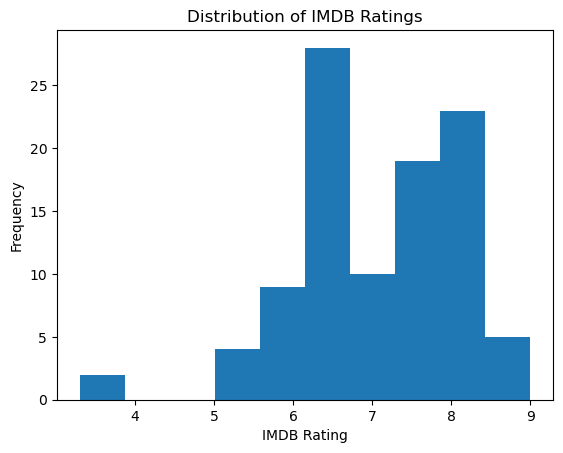

In [38]:
import matplotlib.pyplot as plt

#Histogram of IMDB Ratings
plt.hist(df['IMDB Rating'], bins=10)
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDB Ratings')
plt.show()


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [39]:
#Grouping by 'Release Year' and calculating the mean IMDB rating
mean_rating_by_year = df.groupby('Release Year')['IMDB Rating'].mean()
print(mean_rating_by_year)


Release Year
2001    7.600000
2005    6.500000
2008    7.600000
2011    7.300000
2013    8.200000
2014    7.266667
2016    7.550000
2017    6.600000
2018    8.200000
2019    7.175000
2020    5.550000
2021    7.525000
2022    7.375000
2023    7.203448
2024    6.924444
Name: IMDB Rating, dtype: float64


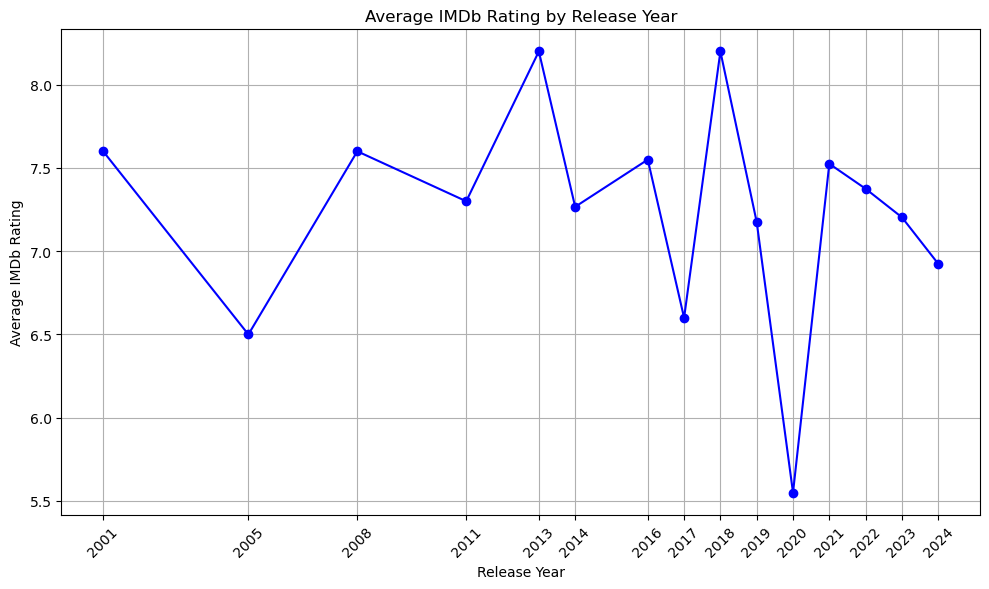

In [40]:
# Data
release_years = mean_rating_by_year.index
avg_ratings = mean_rating_by_year.values

# Plot
plt.figure(figsize=(10, 6))
plt.plot(release_years, avg_ratings, marker='o', color='b', linestyle='-')
plt.title('Average IMDb Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Rating')
plt.grid(True)
plt.xticks(release_years, rotation=45)
plt.tight_layout()
plt.show()


## **Analyzing Top Genres**

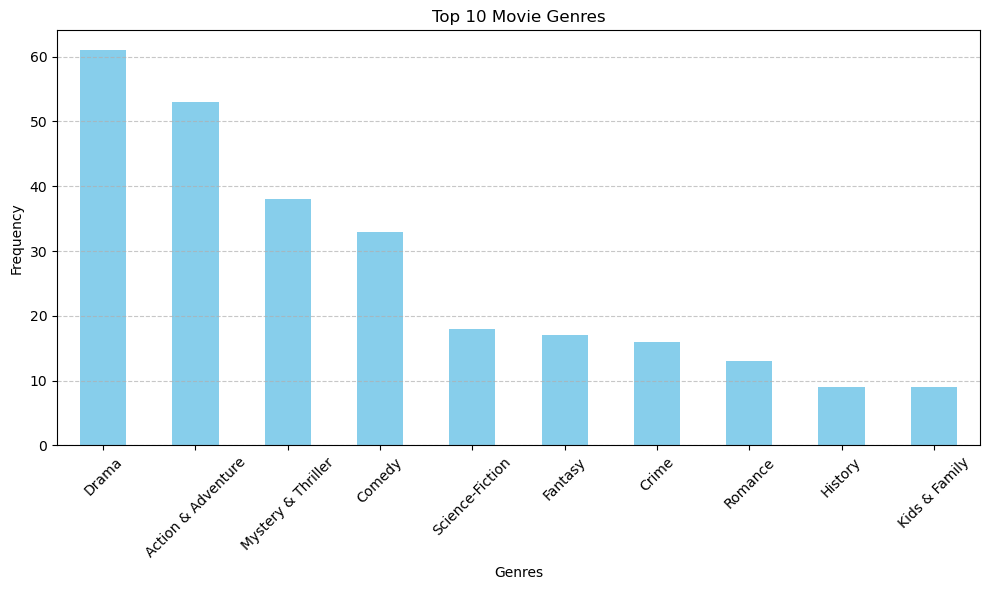

In [41]:
# Step 1: Extract all genres
genres_list = df['Genres'].str.split(', ').explode()

# Step 2: Count the frequency of each genre
genre_counts = genres_list.value_counts()

# Step 3: Visualize the top genres using a bar plot
top_genres = genre_counts.head(10)  # Get the top 10 genres
top_genres.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [47]:
from wordcloud import WordCloud

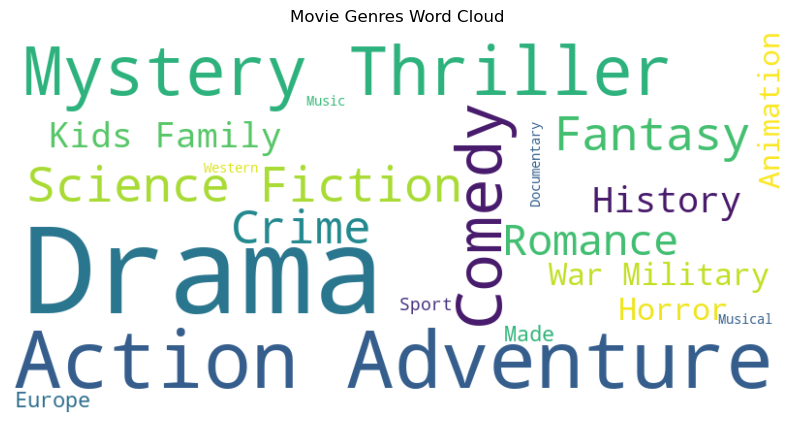

In [49]:
#Let's Visvalize it using word cloud
genres_string = ' '.join(genres_list)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_string)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Movie Genres Word Cloud')
plt.axis('off')
plt.show()


## **Finding Predominant Streaming Service**

In [50]:
# Write Your Code here
# Step 1: Extract all streaming services
streaming_services_list = df['Streaming Services'].explode()

# Step 2: Count the frequency of each streaming service
streaming_service_counts = streaming_services_list.value_counts()

# Step 3: Identify the streaming service with the highest frequency
predominant_streaming_service = streaming_service_counts.idxmax()
max_frequency = streaming_service_counts.max()

print("Predominant Streaming Service:", predominant_streaming_service)
print("Number of Movies on the Predominant Streaming Service:", max_frequency)

Predominant Streaming Service: Amazon Video
Number of Movies on the Predominant Streaming Service: 33


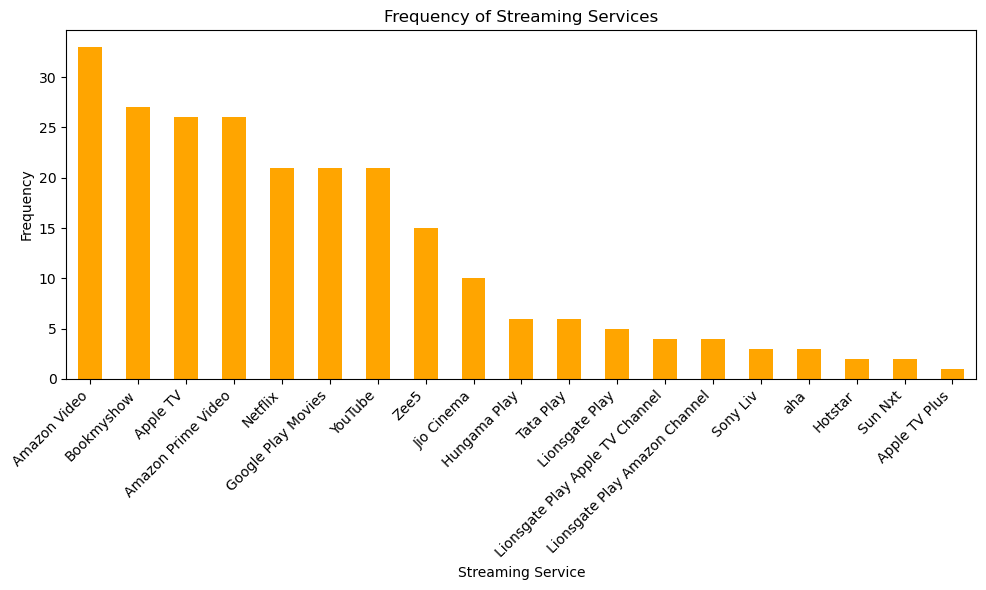

In [51]:
# Convert streaming_service_counts dictionary to pandas Series
streaming_service_counts_series = pd.Series(streaming_service_counts)

# Plotting
plt.figure(figsize=(10, 6))
streaming_service_counts_series.plot(kind='bar', color='orange')
plt.title('Frequency of Streaming Services')
plt.xlabel('Streaming Service')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



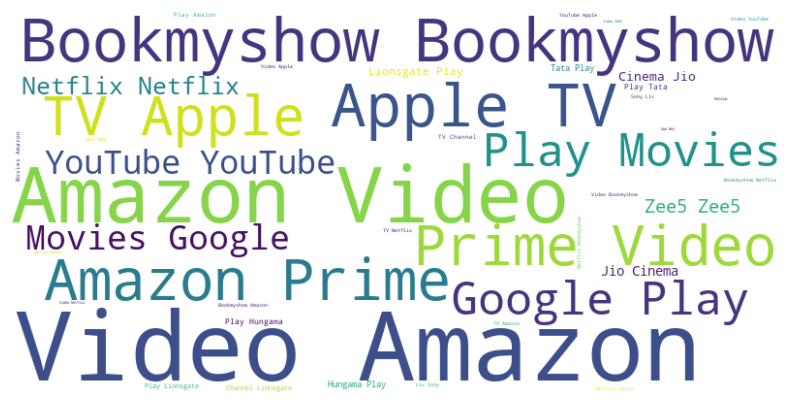

In [52]:

# Drop rows with NaN values in the 'Streaming Services' column
df = df.dropna(subset=['Streaming Services'])

# Split the streaming services into a list
streaming_services_list = [service for sublist in df['Streaming Services'] for service in sublist]

# Count the frequency of each streaming service
streaming_service_counts = pd.Series(streaming_services_list).value_counts().to_dict()

# Create a string of streaming services with each service repeated by its frequency
streaming_services_string = ' '.join([service for service in streaming_services_list for _ in range(streaming_service_counts[service])])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(streaming_services_string)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# FOR TV SHOW

In [53]:
df_tv.head()

TV Show Name                                                URL  \
1     Shogun-2024   https://www.justwatch.com/in/tv-show/shogun-2024   
2        Mirzapur      https://www.justwatch.com/in/tv-show/mirzapur   
3  3-Body-Problem  https://www.justwatch.com/in/tv-show/3-body-pr...   
4       Panchayat     https://www.justwatch.com/in/tv-show/panchayat   
5   The-Gentlemen  https://www.justwatch.com/in/tv-show/the-gentl...   

  Release Year                                             Genres IMDB Rating  \
1       (2024)                     Drama, War & Military, History  9.1  (53k)   
2       (2018)  Crime, Action & Adventure, Drama, Mystery & Th...  8.5  (81k)   
3       (2024)  Science-Fiction, Mystery & Thriller, Drama, Fa...  7.7  (60k)   
4       (2020)                                      Drama, Comedy  8.9  (84k)   
5       (2024)           Action & Adventure, Comedy, Crime, Drama  8.2  (69k)   

  Runtimes           Age Ratings           Production Countries  \
1    58min  Age Rating Not Found                  United States   
2    50min  Age Rating Not Found                          India   
3    56min                     A                  United States   
4    33min  Age Rating Not Found                          India   
5    50min                     A  United States, United Kingdom   

     Streaming Services  
1             [Hotstar]  
2  [Amazon Prime Video]  
3             [Netflix]  
4  [Amazon Prime Video]  
5             [Netflix]

In [54]:

# Define a function to extract the rating from the string
def extract_rating_tv(x):
    if isinstance(x, str):
        parts = x.split()
        if len(parts) > 0:
            if parts[0] == "IMDb":
                return np.nan  # Convert "IMDb Rating Not Found" to NaN
            else:
                return float(parts[0])
    return None

# Apply the function to the "IMDB Rating" column of the TV show DataFrame
df_tv["IMDB Rating"] = df_tv["IMDB Rating"].apply(extract_rating_tv)


In [55]:
# Extract only the year from the Release Year column
df_tv["Release Year"] = df_tv["Release Year"].str.extract(r'(\d{4})')

# Convert the Release Year column to integer
df_tv["Release Year"] = pd.to_numeric(df_tv["Release Year"], errors="coerce")

In [57]:
# Replace "Age Rating Not Found" with NaN
df_tv["Age Ratings"] = df_tv["Age Ratings"].replace("Age Rating Not Found", np.nan)


In [58]:
df_tv['Streaming Services'] = df_tv['Streaming Services'].apply(lambda x: np.nan if len(x) == 0 else x)


In [60]:
df_tv.head()

TV Show Name                                                URL  \
1     Shogun-2024   https://www.justwatch.com/in/tv-show/shogun-2024   
2        Mirzapur      https://www.justwatch.com/in/tv-show/mirzapur   
3  3-Body-Problem  https://www.justwatch.com/in/tv-show/3-body-pr...   
4       Panchayat     https://www.justwatch.com/in/tv-show/panchayat   
5   The-Gentlemen  https://www.justwatch.com/in/tv-show/the-gentl...   

   Release Year                                             Genres  \
1          2024                     Drama, War & Military, History   
2          2018  Crime, Action & Adventure, Drama, Mystery & Th...   
3          2024  Science-Fiction, Mystery & Thriller, Drama, Fa...   
4          2020                                      Drama, Comedy   
5          2024           Action & Adventure, Comedy, Crime, Drama   

   IMDB Rating Runtimes Age Ratings           Production Countries  \
1          9.1    58min         NaN                  United States   
2          8.5    50min         NaN                          India   
3          7.7    56min           A                  United States   
4          8.9    33min         NaN                          India   
5          8.2    50min           A  United States, United Kingdom   

     Streaming Services  
1             [Hotstar]  
2  [Amazon Prime Video]  
3             [Netflix]  
4  [Amazon Prime Video]  
5             [Netflix]

In [61]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV Show Name          100 non-null    object 
 1   URL                   100 non-null    object 
 2   Release Year          100 non-null    int64  
 3   Genres                100 non-null    object 
 4   IMDB Rating           96 non-null     float64
 5   Runtimes              100 non-null    object 
 6   Age Ratings           36 non-null     object 
 7   Production Countries  100 non-null    object 
 8   Streaming Services    88 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [62]:
df_tv.describe()

Release Year  IMDB Rating
count    100.000000    96.000000
mean    2018.950000     7.825000
std        5.563908     1.100239
min     2002.000000     3.400000
25%     2017.000000     7.275000
50%     2021.000000     8.100000
75%     2023.000000     8.600000
max     2024.000000     9.500000

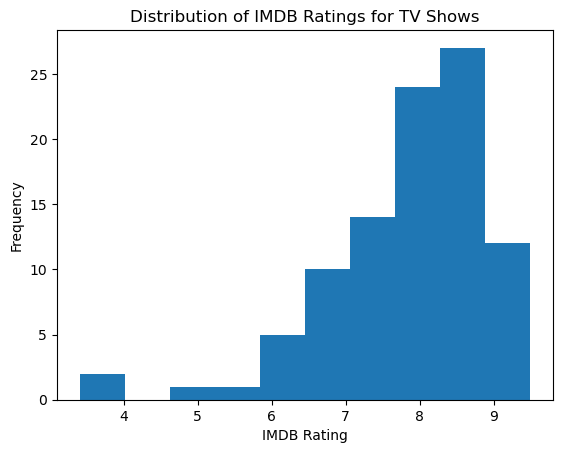

In [63]:
#Histogram of IMDB Ratings
plt.hist(df_tv['IMDB Rating'], bins=10)
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDB Ratings for TV Shows')
plt.show()

In [64]:
#Grouping by 'Release Year' and calculating the mean IMDB rating
mean_rating_by_year = df_tv.groupby('Release Year')['IMDB Rating'].mean()
print(mean_rating_by_year)

Release Year
2002    8.400000
2005    8.400000
2006    3.700000
2007    8.700000
2008    9.500000
2009    8.066667
2010    8.300000
2011    8.850000
2013    8.100000
2014    8.075000
2015    8.700000
2016    8.400000
2017    7.933333
2018    7.812500
2019    8.700000
2020    8.025000
2021    8.266667
2022    7.622222
2023    7.760000
2024    7.186957
Name: IMDB Rating, dtype: float64


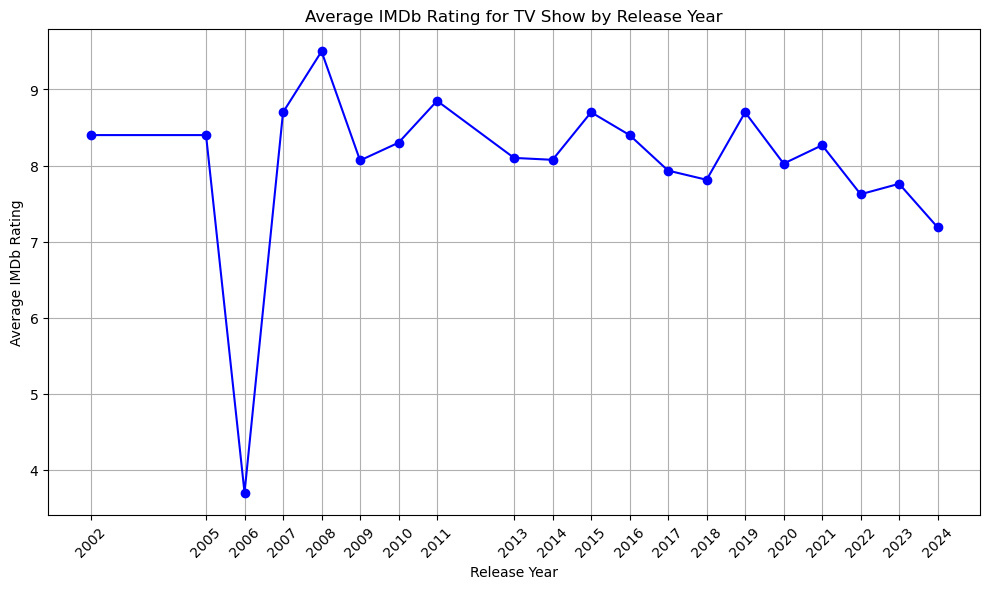

In [65]:
# Data
release_years = mean_rating_by_year.index
avg_ratings = mean_rating_by_year.values

# Plot
plt.figure(figsize=(10, 6))
plt.plot(release_years, avg_ratings, marker='o', color='b', linestyle='-')
plt.title('Average IMDb Rating for TV Show by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Rating')
plt.grid(True)
plt.xticks(release_years, rotation=45)
plt.tight_layout()
plt.show()

## **Analyzing Top Genres for TV Show**

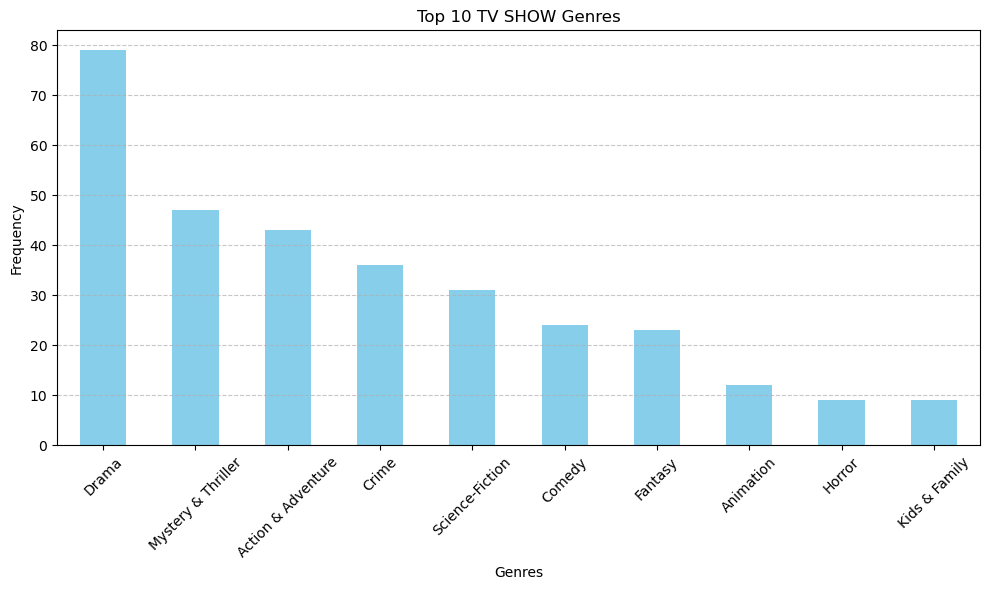

In [66]:
# Step 1: Extract all genres
genres_list = df_tv['Genres'].str.split(', ').explode()

# Step 2: Count the frequency of each genre
genre_counts = genres_list.value_counts()

# Step 3: Visualize the top genres using a bar plot
top_genres = genre_counts.head(10)  # Get the top 10 genres
top_genres.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 TV SHOW Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

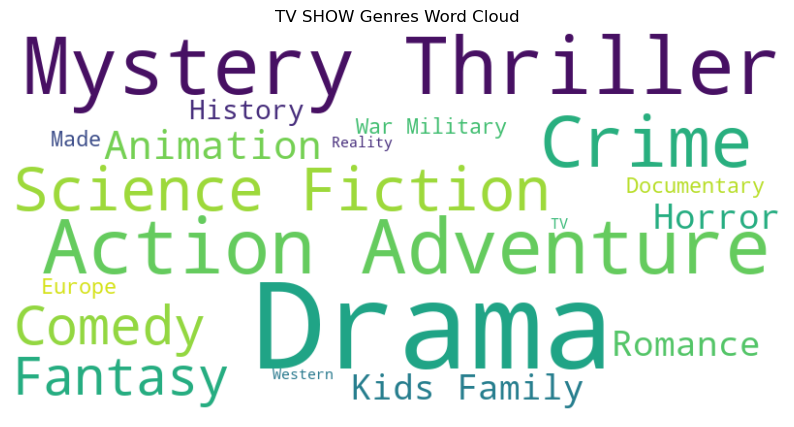

In [67]:
#Let's Visvalize it using word cloud
genres_string = ' '.join(genres_list)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_string)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('TV SHOW Genres Word Cloud')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [68]:
# Write Your Code here
# Step 1: Extract all streaming services
streaming_services_list = df_tv['Streaming Services'].explode()

# Step 2: Count the frequency of each streaming service
streaming_service_counts = streaming_services_list.value_counts()

# Step 3: Identify the streaming service with the highest frequency
predominant_streaming_service = streaming_service_counts.idxmax()
max_frequency = streaming_service_counts.max()

print("Predominant Streaming Service:", predominant_streaming_service)
print("Number of Movies on the Predominant Streaming Service:", max_frequency)

Predominant Streaming Service: Netflix
Number of Movies on the Predominant Streaming Service: 34


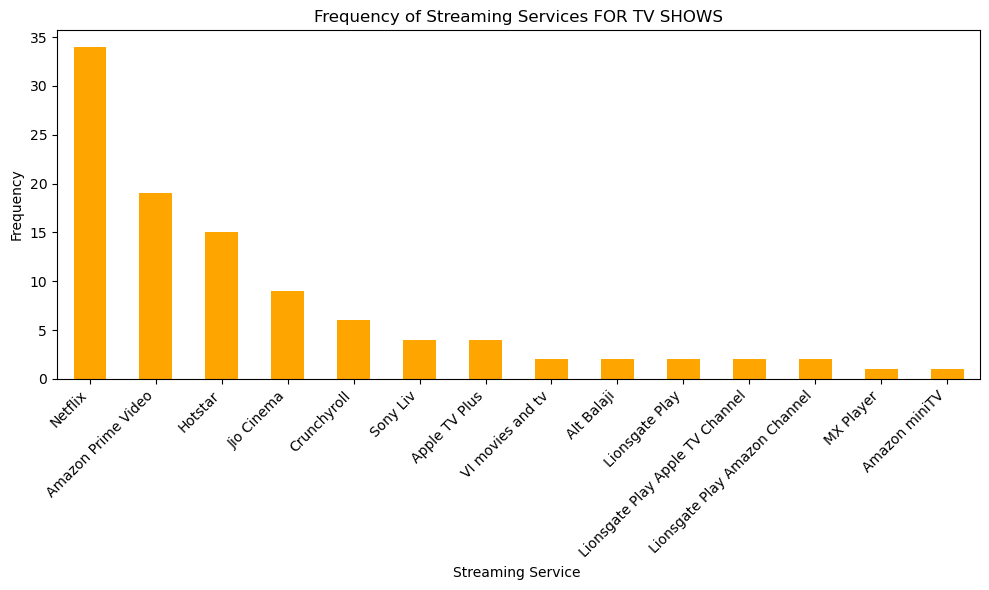

In [69]:
# Convert streaming_service_counts dictionary to pandas Series
streaming_service_counts_series = pd.Series(streaming_service_counts)

# Plotting
plt.figure(figsize=(10, 6))
streaming_service_counts_series.plot(kind='bar', color='orange')
plt.title('Frequency of Streaming Services FOR TV SHOWS')
plt.xlabel('Streaming Service ')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


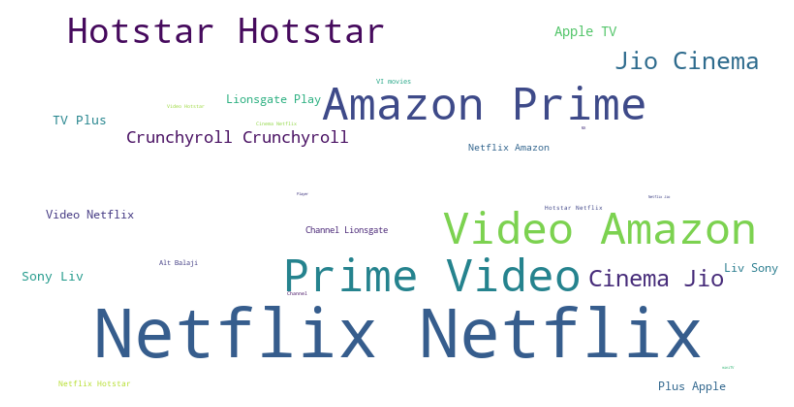

In [70]:

# Drop rows with NaN values in the 'Streaming Services' column
df_tv = df_tv.dropna(subset=['Streaming Services'])

# Split the streaming services into a list
streaming_services_list = [service for sublist in df_tv['Streaming Services'] for service in sublist]

# Count the frequency of each streaming service
streaming_service_counts = pd.Series(streaming_services_list).value_counts().to_dict()

# Create a string of streaming services with each service repeated by its frequency
streaming_services_string = ' '.join([service for service in streaming_services_list for _ in range(streaming_service_counts[service])])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(streaming_services_string)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
df.to_csv('Movie_data.csv', index=False) 
df.to_csv('TV_Show_data.csv', index=False)

In [73]:
#saving filter data as Filter Data in csv format
df.to_csv('Movies_filter_data.csv', index=False) 
df.to_csv('TV_SHOW_filter_data.csv', index=False) 

In [74]:
df.to_excel('Movie_data.xlsx', index=False)
df.to_excel('TV_Show_data.xlsx', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***